In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
categories = os.listdir("./chest_xray/train")
for cat in categories:
    print(cat, '\n')

PNEUMONIA 

NORMAL 



In [3]:
X, Y = [], []
img_s1, img_s2 = 400, 400

def creatTrainingSet():
    a = 0
    dirpath = "./chest_xray/"
    types = ['train', 'test']
    for t in types:
        traindir = os.path.join(dirpath, t)
        for cat in categories:
            Path = os.path.join(traindir, cat)
            class_num = categories.index(cat)
            for img in os.listdir(Path):
                image = os.path.join(Path, img)
                image = cv2.imread(image, cv2.IMREAD_ANYCOLOR)
                image = cv2.resize(image, (img_s1, img_s2))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                
                X.append(image)
                #X.append(cv2.flip(image, -1)) # 180 rotation
                Y.append(class_num)
                #Y.append(class_num)
                a += 1
            print(a)

In [4]:
creatTrainingSet()

KeyboardInterrupt: 

In [5]:
X = np.array(X)/255.
Y = np.array(Y)
print("X shape: " + str(X.shape))


X shape: (5856, 400, 400)


In [6]:
def one_hottie(labels, C):
    One_hot_matrix = tf.one_hot(labels, C)
    return tf.keras.backend.eval(One_hot_matrix)
Y = one_hottie(Y, 1)
print ("Y shape: " + str(Y.shape))

Y shape: (5856, 1)


(400, 400)


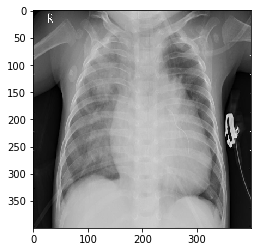

In [7]:
plt.imshow(X[0], cmap='gray')
print(X[0].shape)

In [8]:
len(X)

5856

In [9]:
Z = np.asarray([X[i].flatten() for i in range(len(X))])
print(Z.shape)

KeyboardInterrupt: 

In [ ]:
xp, xn = X[0:3884], X[3884:] 
zn = np.asarray([xn[i].flatten() for i in range(len(xn))])
zp = np.asarray([xp[i].flatten() for i in range(len(xp))])
zn = scale(zn)
zp = scale(zp)
n = 20
covn = PCA(n_components = n)
covp = PCA(n_components = n)
covn.fit(zn)
covp.fit(zp)
varn = covn.explained_variance_ratio_
varp = covp.explained_variance_ratio_
sing_vals = np.arange(n) + 1



In [ ]:
# PCA 
Z = scale(Z) # standardize the data
n = 20
cov = PCA(n_components = n)
cov.fit(Z)
sing_vals = np.arange(n) + 1
variance = cov.explained_variance_ratio_
plt.ylabel("% Variance Explained")
plt.xlabel("Principle Component")
plt.xticks(range(len(sing_vals)))
plt.title("PCA")
plt.plot(sing_vals, variance, 'ro-', linewidth=2, label="Normal&Pneumonia")
plt.plot(sing_vals, varn, 'go-', linewidth=2, label="Normal")
plt.plot(sing_vals, varp, 'bo-', linewidth=2, label="Pneumonia")
plt.legend(loc='upper right')
plt.show()

In [ ]:
pcan = PCA(n_components = 2)
pcap = PCA(n_components = 2)
n_proj = pcan.fit_transform(zn)
p_proj = pcap.fit_transform(zp)
ln = plt.scatter(n_proj[:,0], n_proj[:,1], c='b', alpha=0.5)
lp = plt.scatter(p_proj[:,0], p_proj[:,1], c='g', alpha=0.5)
plt.legend((ln, lp), ("Normal", "Pneumonia"), loc = 'best')

In [ ]:
# fisher's LDA
# %timeit
# chestNet
# torchvision

In [ ]:
path = './output'
try: 
    os.mkdir(path)
except OSError:
    print("Creation of the directory %s failed" % path)
else:
    print("Successfully created the directory %s " % path)

In [ ]:
dir_path = './output1'
os.mkdir(dir_path)
i1 = 0 
cv2.imwrite(os.path.join(dir_path, "{index}.jpeg".format(index=str(i1))), X[i1]*255.)

In [ ]:
for i in range(X.shape[0]):
    cv2.imwrite("./output/{index}.jpeg".format(index=str(i)), X[i]*255.)

In [ ]:
dir_path = './output1'
os.mkdir(dir_path)

In [ ]:
dir_path = './output1'
print(dir_path+"{index}.jpeg".format(index=str(i1)))

In [ ]:
ny = Y.astype(int)
ny[0]

In [ ]:
np.savetxt('./labels.txt', ny)